In [1]:
# Section 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the machine learning model and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("✅ Section 1: Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ Section 1: Libraries imported successfully!


In [2]:
# Section 2: Load the Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#printing the first 5 rows of the train data to see what it looks like
print("Training Data Head:")
print(train_df.head())
print("\n✅ Section 2: Data loaded successfully!")

Training Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

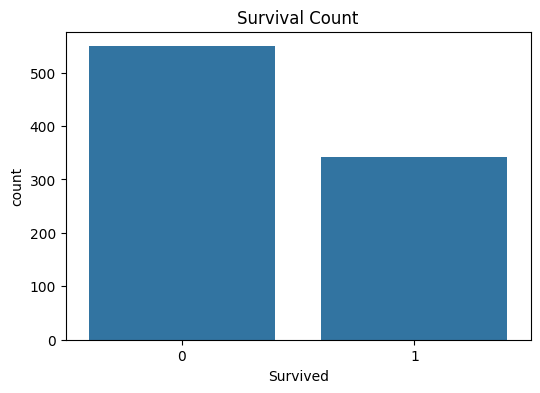

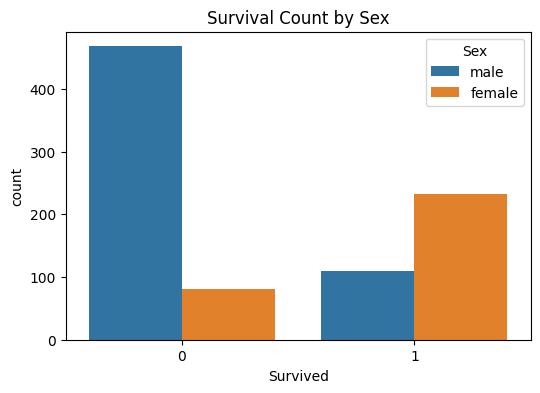

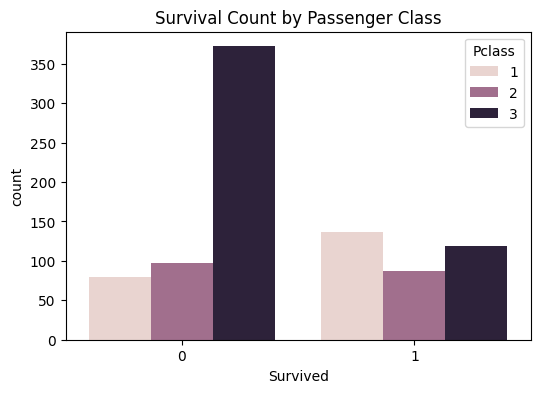


✅ Section 3: EDA complete!


In [3]:
# Section 3: Exploratory Data Analysis (EDA)
print("--- Data Info ---")
# Get a summary of columns, data types, and non-null values
train_df.info()

print("\n--- Missing Values ---")
# Count exactly how many values are missing in each column
print(train_df.isnull().sum())

# --- Visualization ---
print("\n--- Visualizing Data ---")

# Plot 1: Survival Count (0 = Died, 1 = Survived)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

# Plot 2: Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival Count by Sex')
plt.show()

# Plot 3: Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.show()

print("\n✅ Section 3: EDA complete!")

In [ ]:
# # Section 4: Data Cleaning and Feature Engineering

# # We create a function to apply all our changes consistently
# def preprocess(df):
#     # Step 1: Fill missing 'Age' values with the median age
#     df['Age'].fillna(df['Age'].median(), inplace=True)
    
#     # Step 2: Fill missing 'Embarked' values with the most common port
#     df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
#     # Step 3: Fill missing 'Fare' values with the median fare
#     df['Fare'].fillna(df['Fare'].median(), inplace=True)
    
#     # Step 4: Convert 'Sex' to numbers (0 for male, 1 for female)
#     df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)
    
#     # Step 5: Convert 'Embarked' to numbers
#     # We use pd.get_dummies which creates new columns for each port
#     embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
#     df = pd.concat([df, embarked_dummies], axis=1)
#     df.drop('Embarked', axis=1, inplace=True) # Drop the original column
    
#     return df

# # Apply the function to both datasets
# train_processed = preprocess(train_df)
# test_processed = preprocess(test_df)

# # Drop columns that we don't need for the model
# train_processed = train_processed.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
# test_processed = test_processed.drop(['Name', 'Ticket', 'Cabin'], axis=1) # Keep PassengerId for submission

# print("Processed Training Data Head:")
# print(train_processed.head())
# print("\n✅ Section 4: Data preprocessing complete!")

/var/folders/lk/d4nlnj050_dbl3td69kq9c_80000gn/T/ipykernel_34192/1311055344.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/lk/d4nlnj050_dbl3td69kq9c_80000gn/T/ipykernel_34192/1311055344.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [11]:
# Section 4: Data Cleaning and Feature Engineering (UNBREAKABLE VERSION)

def preprocess(df):
    # Step 1: Fill missing values for numerical and simple categorical columns
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    
    # --- UNBREAKABLE FIX FOR 'Sex' COLUMN ---
    # This single line handles all possible issues: NaNs, typos, case-sensitivity.
    # It checks if the lowercase string value is 'female'. If yes, it assigns 1.
    # For everything else, it assigns 0.
    df['Sex'] = np.where(df['Sex'].astype(str).str.lower() == 'female', 1, 0)
    
    # Step 3: Convert 'Embarked' to numerical dummy variables
    embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, embarked_dummies], axis=1)
    df.drop('Embarked', axis=1, inplace=True)
    
    return df

# Apply the function to both datasets
train_processed = preprocess(train_df.copy())
test_processed = preprocess(test_df.copy())

# Drop columns that we don't need for the model
train_processed = train_processed.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
test_processed = test_processed.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

print("Processed Training Data Head:")
print(train_processed.head())
print("\n✅ Section 4: Data preprocessing complete!")

Processed Training Data Head:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    0  38.0      1      0  71.2833        True       False   
2         1       3    0  26.0      0      0   7.9250       False       False   
3         1       1    0  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  

✅ Section 4: Data preprocessing complete!


/var/folders/lk/d4nlnj050_dbl3td69kq9c_80000gn/T/ipykernel_34192/4045061044.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/lk/d4nlnj050_dbl3td69kq9c_80000gn/T/ipykernel_34192/4045061044.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [12]:
# Section 4: Data Cleaning and Feature Engineering (MODERNIZED & WARNING-FREE)

def preprocess(df):
    # Step 1: Fill missing values using the modern assignment style (no inplace=True)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    # Unbreakable fix for 'Sex' Column
    df['Sex'] = np.where(df['Sex'].astype(str).str.lower() == 'female', 1, 0)
    
    # Step 3: Convert 'Embarked' to numerical dummy variables
    embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, embarked_dummies], axis=1)
    df = df.drop('Embarked', axis=1) # Use assignment to drop
    
    return df

# Apply the function to both datasets
train_processed = preprocess(train_df.copy())
test_processed = preprocess(test_df.copy())

# Drop columns that we don't need for the model
train_processed = train_processed.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
test_processed = test_processed.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

print("Processed Training Data Head:")
print(train_processed.head())
print("\n✅ Section 4: Data preprocessing complete!")

Processed Training Data Head:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500       False       False   
1         1       1    0  38.0      1      0  71.2833        True       False   
2         1       3    0  26.0      0      0   7.9250       False       False   
3         1       1    0  35.0      1      0  53.1000       False       False   
4         0       3    0  35.0      0      0   8.0500       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  

✅ Section 4: Data preprocessing complete!


In [13]:
# Section 5: Model Training

# Define our features (X) and our target (y)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_train = train_processed[features]
y_train = train_processed['Survived']

# The test data must have the same feature columns
X_test = test_processed[features]

# Initialize the model. RandomForestClassifier is a strong choice.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the model
model.fit(X_train, y_train)

print("✅ Section 5: Model trained successfully!")

✅ Section 5: Model trained successfully!


In [14]:
# Section 6: Make Predictions
predictions = model.predict(X_test)

print("Predictions made:", predictions[:10]) # Show the first 10 predictions
print("\n✅ Section 6: Predictions complete!")

Predictions made: [0 0 0 0 0 0 0 1 0 0]

✅ Section 6: Predictions complete!


In [15]:
# Section 7: Create Submission File
submission = pd.DataFrame({
    "PassengerId": test_processed["PassengerId"],
    "Survived": predictions
})

# Save the file. The index=False part is important!
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")
print(submission.head())
print("\n✅ Section 7: Project complete!")

Submission file 'submission.csv' created successfully!
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

✅ Section 7: Project complete!
